<a href="https://colab.research.google.com/github/Jojo31100/Projet_7-Air_Paradis-PUBLIC/blob/main/AirParadis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet n°7 - Air Paradis : Réalisez une analyse de sentiments grâce au Deep Learning**

[Lien vers le projet et les attendus](https://openclassrooms.com/fr/paths/795/projects/1516/)

**Comment allez-vous procéder ?**

Cette mission suit un scénario de projet professionnel.

Vous pouvez suivre les étapes pour vous aider à réaliser vos livrables.

Avant de démarrer, nous vous conseillons de :

- lire toute la mission et ses documents liés ;
- prendre des notes sur ce que vous avez compris ;
- consulter les étapes pour vous guider ;
- préparer une liste de questions pour votre première session de mentorat.

---

**Prêt à mener la mission ?**

Vous êtes ingénieur IA chez MIC (Marketing Intelligence Consulting), une entreprise de conseil spécialisée sur les problématiques de marketing digital.

Dans deux semaines, vous avez rendez-vous avec Mme Aline, directrice marketing de la compagnie aérienne “Air Paradis”.

Air Paradis a missionné votre cabinet pour créer un produit IA permettant d'anticiper les bad buzz sur les réseaux sociaux.

Il est vrai que “Air Paradis” n'a pas toujours bonne presse sur les réseaux...

En sortant d'un rendez-vous de cadrage avec les équipes de Air Paradis, vous avez noté les éléments suivants :

- Air Paradis veut un prototype d'un produit IA permettant de prédire le sentiment associé à un tweet.

- Données : pas de données clients chez Air Paradis. Solution : utiliser des [données Open Source](https://www.kaggle.com/kazanova/sentiment140) - ou en téléchargement direct à [ce lien](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+7%C2%A0-+D%C3%A9tectez+les+Bad+Buzz+gr%C3%A2ce+au+Deep+Learning/sentiment140.zip)
 - Description des données : des informations sur les tweets (utilisateur ayant posté, contenu, moment du post) et un label binaire (tweet exprimant un sentiment négatif ou non).

- TO-DO :
 - Préparer un prototype fonctionnel du modèle. Le modèle est exposé via une API déployée sur le Cloud, appelée par une interface locale(notebook ou application Streamlit) qui envoie un tweet à l'API et récupère la prédiction de sentiment.
 - Préparer un support de présentation explicitant les méthodologies utilisées pour les différentes approches (attention : audience non technique).

---

Après avoir reçu votre compte-rendu, Marc, votre manager, vous a contacté pour, selon ses mots, “faire d'une pierre deux coups”.

**De :** *Marc*

**Envoyé :** *hier 17:14*

**À :** *vous*

**Objet :** *Air Paradis : complément*

Salut

Merci pour ton récap du meeting avec Air Paradis. J'ai l'impression que ça s'est bien passé !

Je me disais... Puisque tu vas faire un proto pour ce client, j'ai l'intuition que ce produit pourrait se généraliser à d'autres cas d'usage.

Tu voudrais bien en profiter pour tester plusieurs approches ?

- approche “Modèle sur mesure simple”, pour développer rapidement un modèle classique (ex : régression logistique) permettant de prédire le sentiment associé à un tweet.
- approche “Modèle sur mesure avancé” pour développer un modèle basé sur des réseaux de neurones profonds pour prédire le sentiment associé à un tweet. => C'est ce modèle que tu devras déployer et montrer à Air Paradis.

Pour cette 2ème approche, tu penseras bien à essayer au moins deux word embeddings différents et à garder celui qui permet d'obtenir les meilleures performances. En complément, pourrais-tu également regarder l'apport en performance d'un modèle BERT ? Cela nous permettra de voir si nous devons investir dans ce type de modèle.

Et en même ce serait top si tu pouvais mettre en oeuvre un bon exemple de démarche orientée MLOps, tu sais c'est la nouvelle priorité de notre directeur !

J'aimerais que tu puisses démontrer à l'occasion de l'élaboration de ton prototype tout l'apport du MLOps, afin d'assurer une diffusion aux autres équipes :

- d'abord réaliser une présentation synthétique des principes du MLOps et ses apports,
- ensuite utiliser l'outil MLFlow, future référence pour notre société, pour assurer la gestion des expérimentations des modèles : tracking et reporting de l'entraînement des modèles, centralisation du stockage des modèles, et test du serving proposé par MLFlow,
- mettre en oeuvre un pipeline de déploiement continu du modèle que tu auras choisi via une API (Git + Github + plateforme Cloud au choix), qui intègre également des tests unitaires automatisés,
- et enfin initier un suivi de la performance du modèle en production. Pour cela tu utiliseras un service Azure Application Insight que tu auras créé pour l‘occasion :
 - Pour remonter des traces des tweets qui seraient considérés par l'utilisateur comme mal prédits : le texte du tweet et la prédiction.
 - Pour déclencher une alerte (envoi SMS ou mail) dans le cas d'un nombre trop important de tweet mal prédits (par exemple 3 tweets mal prédits en l'espace de 5 minutes).
 - Présenter une démarche qui pourrait être mise en oeuvre pour l'analyse de ces statistiques et l'amélioration du modèle dans le temps.

Nous souhaitons limiter les coûts de mise en production de ce prototype, donc peux-tu privilégier une solution gratuite Cloud pour le déploiement de l'API de prédiction, par exemple Azure webapp (ASP F1 gratuit), PythonAnywhere, Heroku avec le package “student” de Github ou tout autre solution ?

Si le modèle avancé est trop lourd et induit un dépassement des limites de taille des solutions gratuites, tu pourras tester le déploiement avec le modèle classique, ou bien utiliser des techniques de réduction de taille de ton modèle TensorFlow-Keras via une conversion en TensorFlow Lite.

Merci d'avance !

*Marc*

PS : Ah au fait, tant que tu y es, tu pourras rédiger un petit article pour le blog à partir de ton travail de modélisation et de ta démarche orientée MLOps ?

---

Vous avez pris connaissance du mail, vous avez hâte de démarrer ce nouveau projet avec intérêt ! C'est parti !

# Initialisation : chargement des bibliothèques Python et des fonctions globales

In [24]:
from google.colab import drive
import pandas
import numpy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot
import seaborn
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [ ]:
#############################################
## DATAFRAME MAIN INFORMATIONS AT A GLANCE ##
#############################################
def _visualisationDataset(_inputDataframe, _pourcentageRemplissageTarget, _legendesGraph="No"):
    nbDonneesPresentesGlobal = 0
    tailleDataframe = _inputDataframe.shape[0]
    for index in _inputDataframe.columns:
        nbIndividus = _inputDataframe[index].notna().sum()
        nbNaN = _inputDataframe[index].isna().sum()
        typeDonnee = _inputDataframe[index].dtype
        pourcentageRemplissage = round((nbIndividus / tailleDataframe) * 100, 2)

        if (pourcentageRemplissage >= _pourcentageRemplissageTarget):
            ligne = f"[>\033[32m{_pourcentageRemplissageTarget}%\033[0m] "
            ligne += f"Variable : \033[1m\033[3m{index:<50}\033[0m"
            ligne += f"Remplissage : \033[32m\033[1m{str(pourcentageRemplissage).rjust(5)} %\033[0m"
        else:
            ligne = f"[<\033[31m{_pourcentageRemplissageTarget}%\033[0m] "
            ligne += f"Variable : \033[1m\033[3m{index:<50}\033[0m"
            ligne += f"Remplissage : \033[31m\033[1m{str(pourcentageRemplissage).rjust(5)} %\033[0m"
        ligne += f" (\033[3m{str(nbIndividus).rjust(5)}\033[0m individus/\033[3m{tailleDataframe}\033[0m)"
        ligne += f"\tNaN : \033[1m{str(nbNaN).rjust(5)}\033[0m"
        ligne += f"\tType : \033[3m{str(typeDonnee):<5}\033[0m"
        if (typeDonnee == "object"):
            nbUniques = _inputDataframe[index].nunique()
            ligne += f"\t(Individus uniques : \033[1m{nbUniques}\033[0m)"
        elif (typeDonnee == "bool"):
            ligne += f"\t(\"0\" vs. \"1\" = \033[1m{_inputDataframe[index].value_counts().get(True, 0)}\033[0m vs. \033[1m{_inputDataframe[index].value_counts().get(False, 0)}\033[0m)"
        elif (typeDonnee == "datetime64[ns]"):
            ligne += f" -- TIME STAMP !"
        else:
            min = round(_inputDataframe[index].min(), 2)
            max = round(_inputDataframe[index].max(), 2)
            moyenne = round(_inputDataframe[index].mean(), 2)
            ligne += f"\t(Min = \033[1m{min:<5}\033[0m Max = \033[1m{max:<5}\033[0m Moyenne = \033[1m{moyenne}\033[0m)"
        print(ligne)
        nbDonneesPresentesGlobal = nbDonneesPresentesGlobal + nbIndividus

    print("\nAu global ", nbDonneesPresentesGlobal, " données sont présentes, sur un total de ", _inputDataframe.shape[0]*_inputDataframe.shape[1], ", soit un remplissage de ", round( ((nbDonneesPresentesGlobal*100)/(_inputDataframe.shape[0]*_inputDataframe.shape[1])), 2),"%", sep="")
    print(_inputDataframe.dropna().shape[0], " individus ne comptent aucun \"NaN\"", sep="")
    print("Taille du dataset : ", _inputDataframe.shape[0], " individus, et ", _inputDataframe.shape[1], " variables\n\n", sep="")

    dataframeRepartitionTest = _inputDataframe.count()*100/_inputDataframe.shape[0]
    matplotlib.pyplot.figure(figsize=(20, 5))
    matplotlib.pyplot.title("Représentation graphique de répartition du contenu du dataset")
    matplotlib.pyplot.xlabel("Variables")
    matplotlib.pyplot.ylabel("Pourcentage de remplissage")
    matplotlib.pyplot.bar(dataframeRepartitionTest.index, dataframeRepartitionTest.values, color="skyblue", edgecolor="black")
    matplotlib.pyplot.axhline(y=25, color="yellow", linestyle="--", linewidth=2)
    matplotlib.pyplot.axhline(y=33, color="orange", linestyle="--", linewidth=2)
    matplotlib.pyplot.axhline(y=50, color="red", linestyle="-", linewidth=2)
    matplotlib.pyplot.axhline(y=66, color="orange", linestyle="--", linewidth=2)
    matplotlib.pyplot.axhline(y=75, color="yellow", linestyle="--", linewidth=2)
    if (_legendesGraph == "No"):
        matplotlib.pyplot.xticks([])
    else:
        matplotlib.pyplot.xticks(rotation=80)
        matplotlib.pyplot.xlim(-0.5, _inputDataframe.shape[1] - 0.5)
        matplotlib.pyplot.show()

#Rouge        : \033[31m
#Vert         : \033[32m
#Jaune        : \033[33m
#Bleu         : \033[34m
#Cyan         : \033[36m
#Gras         : \033[1m
#Italique     : \033[3m
#Réinit style : \033[0m


#Fonction de nettoyage de texte : 1)Passage en minuscule / 2)Tokenisation / 3)Suppression des tokens de moins de X caractères / 4)Suppression des tokens trouvés plus de X fois / 5)Suppression des StopWords NLTK / 6) Lemmatisation ou Racinisation (ou rien du tout)
#
#INPUT :
########
#    _inputDataframe                      : dataframe Pandas source
#    _inputFeaturesNames                  : Nom de la variable contenant des données textuelles à traiter
#    _inputDropTokenIfLessThanXChars      : Nombre de caractère minimum pour un token (tous les tokens de moins de "_inputDropTokenIfLessThanXChars" caractères, seront supprimés)
#                                                                               Si "_inputDropTokenIfLessThanXChars" = 0 --> On passe
#    _inputDropTokenIfFoundMoreThanXTimes : Nombre d'occurence maximum d'un token (tous les tokens présents plus de "_inputDropTokenIfFoundMoreThanXTimes" fois, seront supprimés)
#                                                                               Si "_inputDropTokenIfFoundMoreThanXTimes" = 0 --> On passe
#    _inputLanguage                       : Langue dans laquelle on va télécharger le StopWords NLTK les plus courants
#    _inputLemmatizationOrStemmingChoice  : Choix du traitement des tokens : soit on procède à une "Lemmatisation" (_inputLemmatizationOrStemmingChoice="LEM"),
#                                                                            soit à une "Racinisation" (_inputLemmatizationOrStemmingChoice="STEM"),
#                                                                            soit ne RIEN FAIRE de plus (_inputLemmatizationOrStemmingChoice="NONE")
#
#OUTPUT :
#########
#    Les tokens (qui ont été traités)
#
def _textCleaning(_inputDataframe, _inputFeaturesNames, _inputDropTokenIfLessThanXChars=0, _inputDropTokenIfFoundMoreThanXTimes=0, _inputLanguage="english", _inputLemmatizationOrStemmingChoice="NONE"):
    #On va créer une copie pour ne pas modifier le DataFrame original
    tempDataframe = _inputDataframe.copy()

    #1ère étape : on passe tous les caractères en minuscules et on vire les caractères spéciaux !
    tempDataframe["tokens"] = tempDataframe[_inputFeaturesNames].astype(str).str.lower().fillna("")
    tempDataframe["tokens"] = tempDataframe["tokens"].str.replace("-", " ").str.replace("+", " ").str.replace("/", " ").str.replace("#", " ").str.replace("_", " ").str.replace("&", " ").str.replace("(", " ").str.replace(")", " ").str.replace("@", " ")

    #2ème étape : on ne garde que les mots constitués de caracètres alphabétiques (Tokenisation)
    tokenizer = nltk.RegexpTokenizer(r"[^\W\d_]+")
    tempDataframe["tokens"] = tempDataframe["tokens"].apply(tokenizer.tokenize)

    #3ème étape : on vire les tokens de moins de "_inputDropTokenIfLessThanXChars" caractères
    if(_inputDropTokenIfLessThanXChars != 0):
        tempDataframe["tokens"] = tempDataframe["tokens"].apply(lambda tokens: [token for token in tokens if len(token) >= _inputDropTokenIfLessThanXChars])
    else:
        pass

    #4ème étape : on virer les X tokens les plus fréquents
    if(_inputDropTokenIfFoundMoreThanXTimes != 0):
      #On met à plat toutes les listes de tokens en une seule grande liste
      flattenTokens = [token for sublist in tempDataframe["tokens"] for token in sublist]
      #On compte les occurrences de chaque token
      numberOfTokens = Counter(flattenTokens)
      #On filtrer les tokens qui apparaissent X fois ou plus
      filteredTokensList = [item for item in numberOfTokens.most_common() if item[1] >= _inputDropTokenIfFoundMoreThanXTimes]
      mostCommonTokens = Counter(dict(filteredTokensList))
      #DEBUG - DECOMMENTER CETTE LIGNE POUR AFFICHER LA LISTE DES TOKENS LES PLUS COURANTS
      #display(mostCommonTokens)
      #On converti les clés des tokens les plus courants en un ensemble
      stopWords = set(mostCommonTokens.keys())
      #On applique la suppression des StopWords à chaque liste de tokens dans la variable "tokens"
      tempDataframe["tokens"] = tempDataframe["tokens"].apply(lambda tokens: [token for token in tokens if token not in stopWords])
    else:
        pass

    #5ème étape : on télécharge les StopWords NLTK les plus courants de la langue "_inputLanguage"
    nltk.download("stopwords")
    stopWords = set(stopwords.words(_inputLanguage))
    #On applique la suppression des StopWords à chaque liste de tokens dans la variable "tokens"
    tempDataframe["tokens"] = tempDataframe["tokens"].apply(lambda tokens: [token for token in tokens if token not in stopWords])

    #6ème étape : on lemmatise ("LEM") ou on racinise ("STEM") les tokens
    nltk.download("wordnet")
    if(str(_inputLemmatizationOrStemmingChoice).lower() == "lem"):
        print("***Lemmatization***")
        lemmatizer = WordNetLemmatizer()
        tempDataframe["tokens"] = tempDataframe["tokens"].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])
    elif(str(_inputLemmatizationOrStemmingChoice).lower() == "stem"):
        print("***Stemming***")
        stemmer = PorterStemmer()
        tempDataframe["tokens"] = tempDataframe["tokens"].apply(lambda tokens: [stemmer.stem(token) for token in tokens])
    else:
        pass

    #Display post-cleaning informations
    flattenTokensList = [token for sublist in tempDataframe["tokens"] for token in sublist]
    print("Nombre total de tokens\t\t:", len(flattenTokensList))
    print("Nombre de tokens uniques\t:", len(Counter(flattenTokensList)))

    return tempDataframe["tokens"]

# Partie 1 : installation du pipeline

On part du principe qu'on va utiliser Google Colab pour le développement, tout en liant le compte avec GitHub, dans lequel on a créé un repository public nommé ["Projet_7-Air_Paradis-PUBLIC"](https://github.com/Jojo31100/Projet_7-Air_Paradis-PUBLIC)


## 1.1. MLflow

In [18]:
#Installation de MLFlow pour suivre la totalité des modèles (temps d'entrainement, d'inférence, résultats, meilleurs paramètres, ...)
!pip install mlflow
import mlflow

## 1.2. ngrok

In [23]:
#Installation de ngrok pour accéder à MLflow UI depuis Google Colab
!pip install pyngrok
from pyngrok import ngrok

#Ferme toutes les instances précédentes de NGrok
ngrok.kill()

#Paramétrage du token
ngrokAuthToken = "30GdRuK989WiPWr5DbDm7Zv23eF_7j5moxUiutbaNa85GnjUP"
ngrok.set_auth_token(ngrokAuthToken)

#On créé un nouveau tunnel sur le port 5000
ngrokTunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("\n\nPour accéder à l'UI de MLflow, cliquer ici - attendez juste quelques secondes, le temps que la UI se lance ! ;) :", ngrokTunnel.public_url, "\n\n")

#On démarre la UI
!mlflow ui

MLflow UI disponible ici : https://27ab752b8227.ngrok-free.app
[2025-07-23 08:34:18 +0000] [21504] [INFO] Starting gunicorn 23.0.0
[2025-07-23 08:34:18 +0000] [21504] [INFO] Listening at: http://127.0.0.1:5000 (21504)
[2025-07-23 08:34:18 +0000] [21504] [INFO] Using worker: sync
[2025-07-23 08:34:18 +0000] [21505] [INFO] Booting worker with pid: 21505
[2025-07-23 08:34:18 +0000] [21506] [INFO] Booting worker with pid: 21506
[2025-07-23 08:34:18 +0000] [21507] [INFO] Booting worker with pid: 21507
[2025-07-23 08:34:18 +0000] [21508] [INFO] Booting worker with pid: 21508
[2025-07-23 08:57:38 +0000] [21504] [INFO] Handling signal: int
[2025-07-23 08:57:38 +0000] [21507] [INFO] Worker exiting (pid: 21507)
[2025-07-23 08:57:38 +0000] [21506] [INFO] Worker exiting (pid: 21506)
[2025-07-23 08:57:38 +0000] [21508] [INFO] Worker exiting (pid: 21508)
[2025-07-23 08:57:38 +0000] [21505] [INFO] Worker exiting (pid: 21505)

Aborted!
[2025-07-23 08:57:40 +0000] [21504] [INFO] Shutting down: Master


# Partie 2 : Analyse Exploratoire des Données

In [ ]:
#Loading data
drive.mount("/content/drive/")

#Comme le dataset fourni ne contient pas la 1ère ligne avec les noms des variables, on va préparer le dataframe Pandas manuellement, en les rajoutants
nomsVariables = ["target", "ids", "date", "flag", "user", "text"] #Informations trouvées ici : https://www.kaggle.com/datasets/kazanova/sentiment140

#On charge nos données
dataframe = pandas.read_csv("/content/drive/My Drive/Colab_Notebooks/Project_7/dataset/training.1600000.processed.noemoticon.csv", encoding="latin-1", header=None, names=nomsVariables)
dataframe.shape

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(1600000, 6)

[>100%] Variable : target                                            Remplissage : 100.0 % (1600000 individus/1600000)	NaN :     0	Type : int64	(Min = 0     Max = 4     Moyenne = 2.0)
[>100%] Variable : ids                                               Remplissage : 100.0 % (1600000 individus/1600000)	NaN :     0	Type : int64	(Min = 1467810369 Max = 2329205794 Moyenne = 1998817552.3)
[>100%] Variable : date                                              Remplissage : 100.0 % (1600000 individus/1600000)	NaN :     0	Type : object	(Individus uniques : 774363)
[>100%] Variable : flag                                              Remplissage : 100.0 % (1600000 individus/1600000)	NaN :     0	Type : object	(Individus uniques : 1)
[>100%] Variable : user                                              Remplissage : 100.0 % (1600000 individus/1600000)	NaN :     0	Type : object	(Individus uniques : 659775)
[>100%] Variable : text                                              Remplissage : 100.0 % (1600

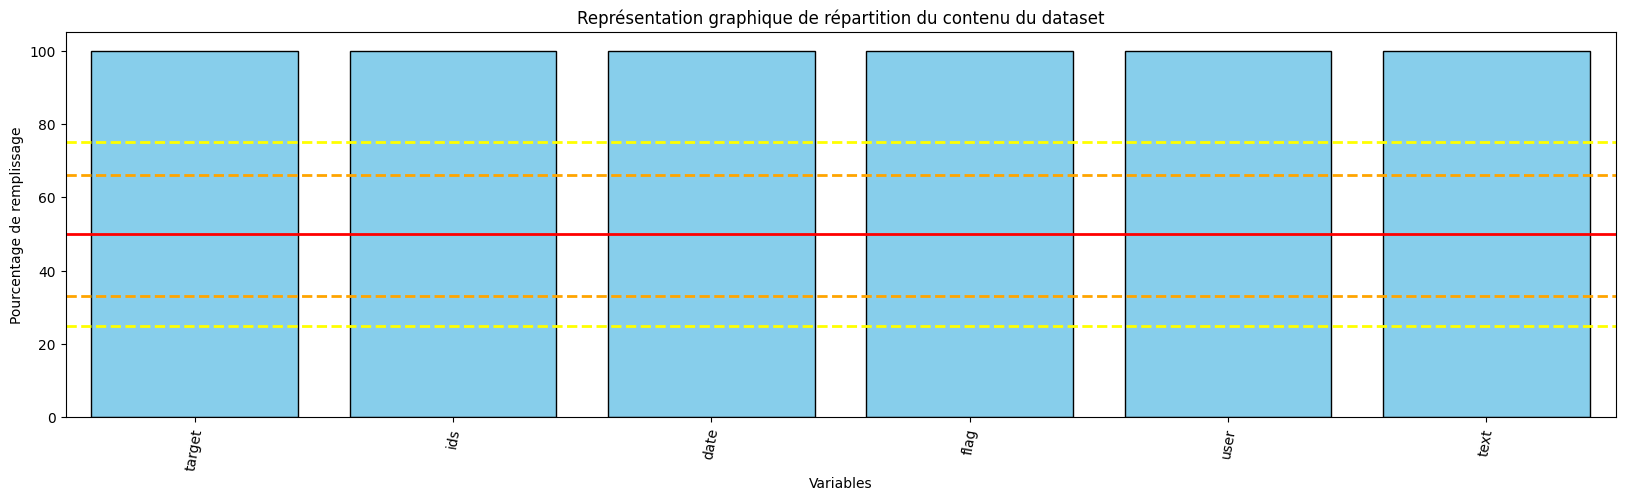

In [ ]:
_visualisationDataset(dataframe, 100, "Yes")

D'emblée, on constate déjà beaucoup de choses :
1. Les variables "ids", "date", "flag", "user" ne nous serviront sans doute pas à grand chose...
2. La base est énorme :  1,6 millions de tweets
3. La variable target semble équilibrée (valeur min=0 / valeur max=4 / moyenne=2 ; Ce qui signifie qu'il y a autant de 0 que de 4 !)
4. La variable "flag" ne sera, pour sûr, d'absolument AUCUNE utilité (1 seule valeur sur l'ensemble du dataset !)

Donc, les variables intéressantes seront :
- "target" (la target à prédire : 0=Tweet négatif / 4=Tweet positif)
- "text" (les données d'entraînement/validation/test)

# Partie 3 : construction d'un dataset pour l'entrainement, la validation et le test de nos modèles

Entraîner la totalité de nos modèles sur les 1,6 millions de tweets paraît chronophage et pas forcément utile.

On va donc faire un sous-échantillon (équivalent à 5% du dataset de base), de 8000 tweets.

Ce qui devrait être amplement suffisant pour entrainer/valider et tester nos différents modèles (avant de sélectionner le meilleur modèle et de le tester sur l'entièreté du dataset.

Il sera important toutefois de procéder à un mélange aléatoire (mais reproductible) des données : la target étant négative sur les 50 premiers pourcents du dataset, et positive sur les 50% restants.

In [25]:
#Sous-échantillonnage de 8000 individus (5% des 1,6 million de Tweets), stratifié sur la variable "target"
subDataframe, _ = train_test_split(dataframe, train_size=8000, stratify=dataframe["target"], random_state=23011977)

[>100%] Variable : target                                            Remplissage : 100.0 % ( 8000 individus/8000)	NaN :     0	Type : int64	(Min = 0     Max = 4     Moyenne = 2.0)
[>100%] Variable : ids                                               Remplissage : 100.0 % ( 8000 individus/8000)	NaN :     0	Type : int64	(Min = 1467811795 Max = 2329147461 Moyenne = 2000871206.78)
[>100%] Variable : date                                              Remplissage : 100.0 % ( 8000 individus/8000)	NaN :     0	Type : object	(Individus uniques : 7958)
[>100%] Variable : flag                                              Remplissage : 100.0 % ( 8000 individus/8000)	NaN :     0	Type : object	(Individus uniques : 1)
[>100%] Variable : user                                              Remplissage : 100.0 % ( 8000 individus/8000)	NaN :     0	Type : object	(Individus uniques : 7828)
[>100%] Variable : text                                              Remplissage : 100.0 % ( 8000 individus/8000)	NaN :     

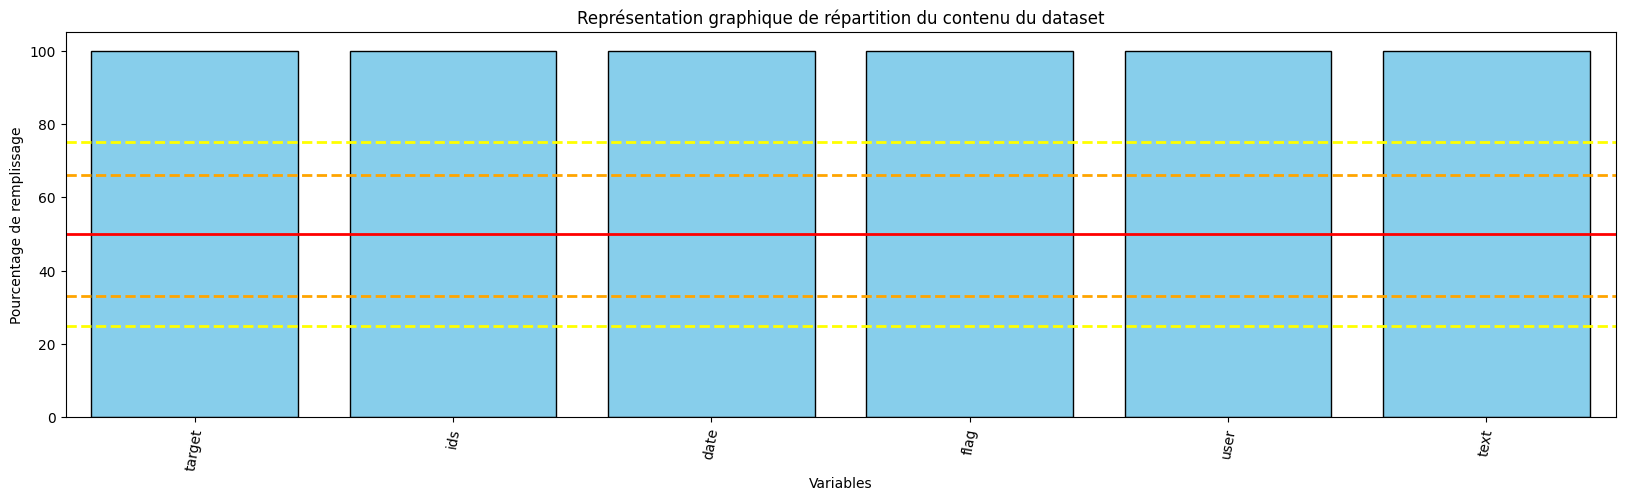

In [26]:
_visualisationDataset(subDataframe, 100, "Yes")